In [29]:
import nibabel as nib
import numpy as np
import matplotlib.pylab as plt
import sys
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import plotly.io as pio
sys.path.append('../../src/')

# custom scripts
from visualization import plot_batch
from helpers import get_fourier_transform
from spiraltrajectory import spiral_samples_trajectory, kspace_measurements_spiral, minimum_energy_reconstruction

layout = go.Layout(template="plotly_dark")
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'
plt.style.use('dark_background')

In [5]:
IMG_PATH = '../../data/scanVisit__0003__0003/MRI__0001/t2/Native/Original__0001/NIFTI/f0001.img'
HEADER_PATH = '../../data/scanVisit__0003__0003/MRI__0001/t2/Native/Original__0001/NIFTI/f0001.hdr'

imgs = nib.load(IMG_PATH)
data = imgs.get_fdata()
img = data.T[0]

## Plot transposed image

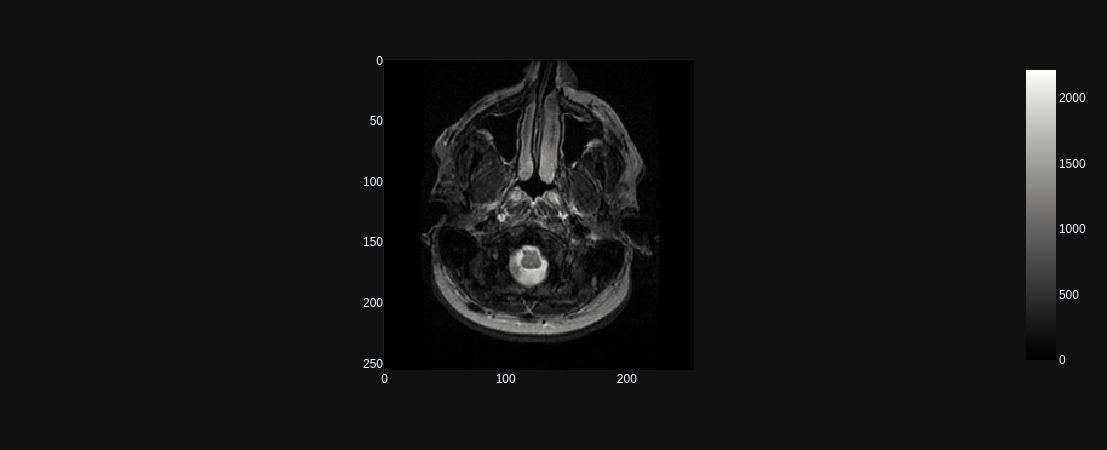

In [32]:
px.imshow(img, color_continuous_scale='gray')

## 2d Fourier Transform

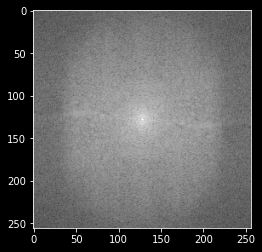

In [25]:
from matplotlib.colors import LogNorm

im_fft = np.fft.fft2(img)
im_fft.shape
plt.imshow(np.abs(np.fft.fftshift(im_fft)), norm=LogNorm(vmin=5), cmap='gray')
# _ = plt.title('Fourier transform')

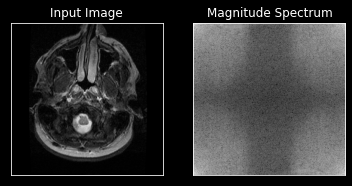

In [34]:
transformed_imgs = [get_fourier_transform(img, use_absolute=True) for img in data.T]

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(transformed_imgs[0], cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Plot Images Batch with Fourier Transforms

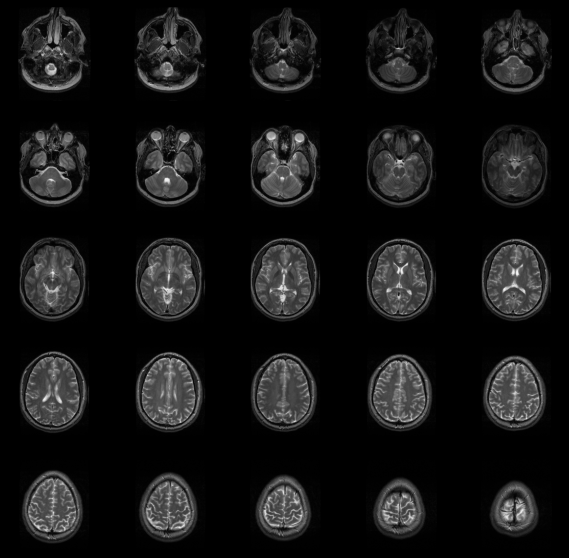

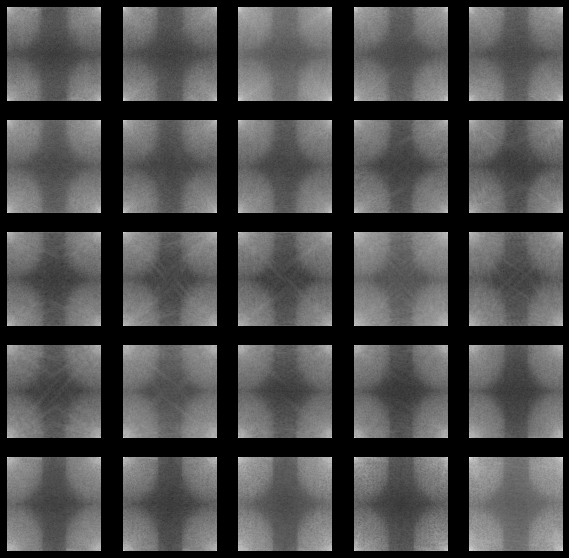

In [35]:
plot_batch(data.T)
plot_batch(transformed_imgs)

## K-space Spiral Trajectory

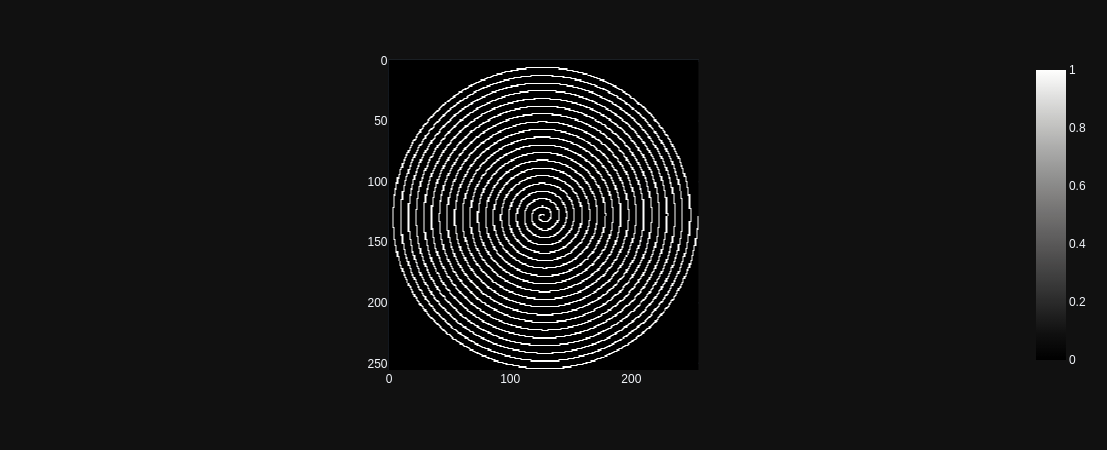

In [37]:
img_size = 256
samples_rows, i, j, I =  spiral_samples_trajectory(width=img_size, height=img_size, n_turns=20)

px.imshow(np.fft.fftshift(I), color_continuous_scale='gray')

# Get K Space measurements

In [38]:
measurements = kspace_measurements_spiral(img, samples_rows)
measurements.size

10173

# Reconstruct image with minimum energy algorithm

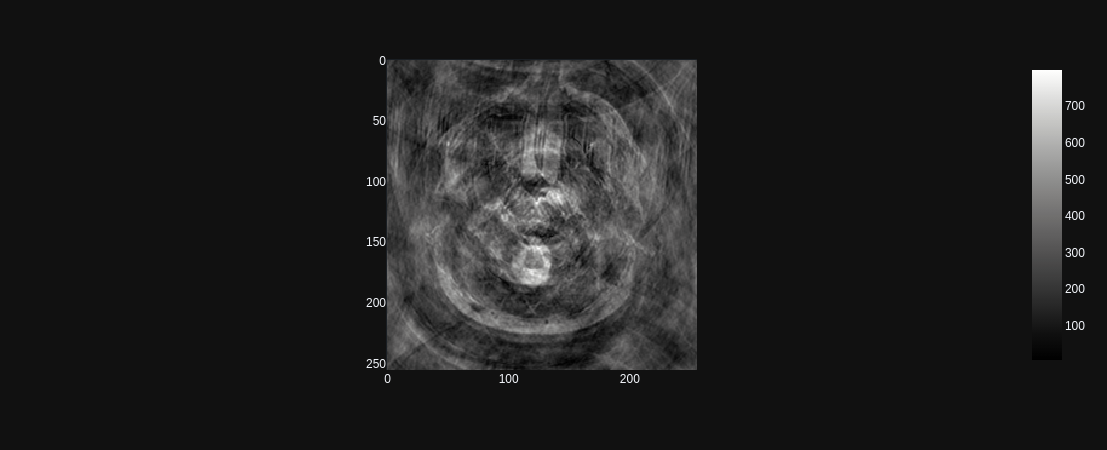

In [40]:
reconstructed_img = minimum_energy_reconstruction(measurements, 256, 256, samples_rows)
px.imshow(np.abs(reconstructed_img), color_continuous_scale='gray')